In [ ]:
!pip install pandas
!pip install matplotlib numpy
!pip install colorama

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from colorama import Fore, Back, Style


In [142]:
def image_plotter(image):
    
    image_data = np.array(image).reshape((16, 16))
    plt.imshow(image_data, cmap='gray')
    plt.show()

In [143]:
U_array = []
S_array = []
VT_array = []

def dataframe_SVD_creator(path):
    df = pd.read_csv(path)

    first_img = df.iloc[0]
    image_plotter(first_img)
    Images_Matrix = np.array(df).transpose()
    U, S, VT = np.linalg.svd(Images_Matrix)
    U_array.append(U)
    S_array.append(S)
    VT_array.append(VT)

    


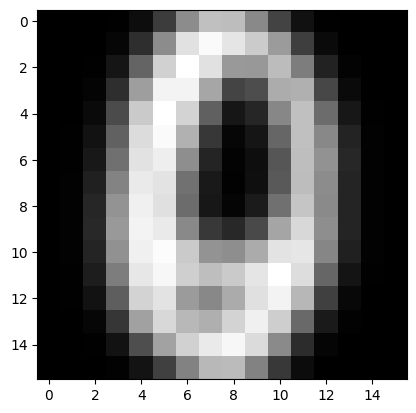

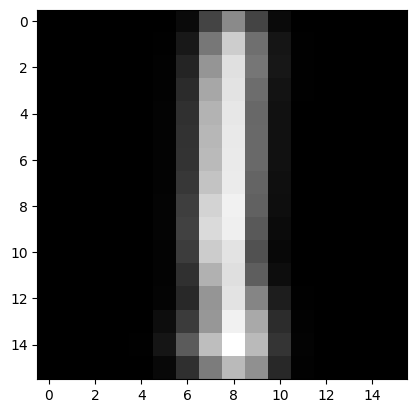

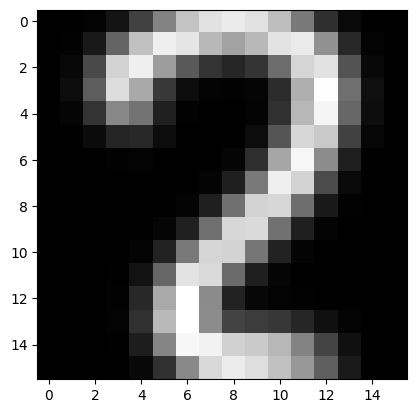

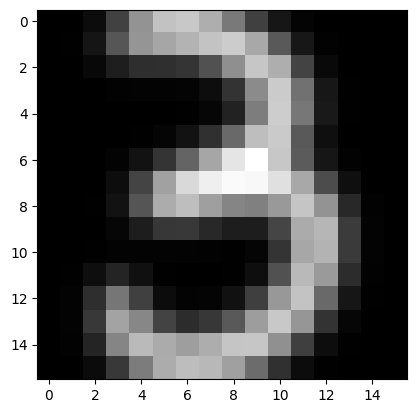

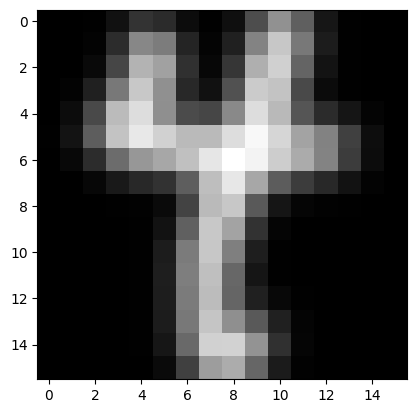

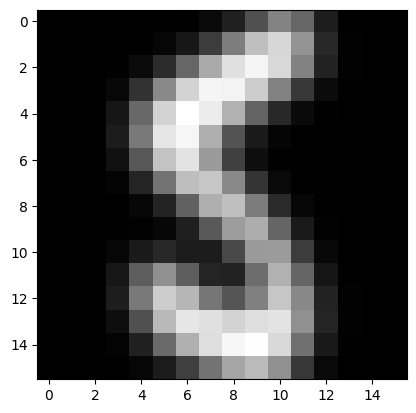

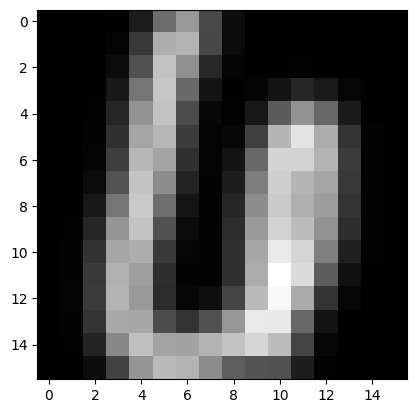

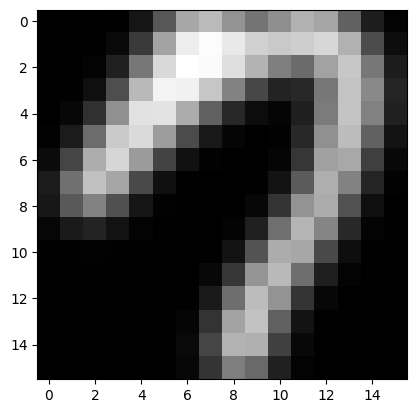

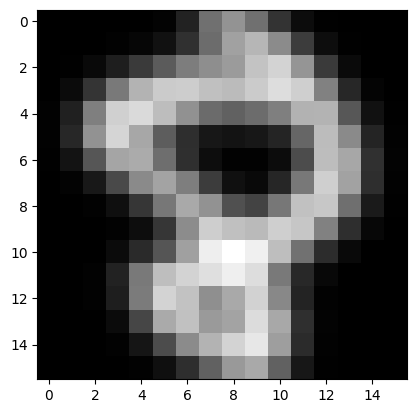

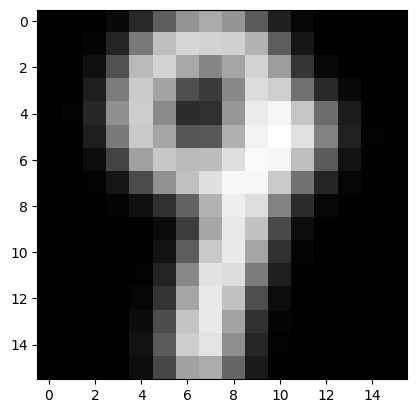

In [144]:
dataframe_SVD_creator('USPS Digits/usps-training-0.csv')
dataframe_SVD_creator('USPS Digits/usps-training-1.csv')
dataframe_SVD_creator('USPS Digits/usps-training-2.csv')
dataframe_SVD_creator('USPS Digits/usps-training-3.csv')
dataframe_SVD_creator('USPS Digits/usps-training-4.csv')
dataframe_SVD_creator('USPS Digits/usps-training-5.csv')
dataframe_SVD_creator('USPS Digits/usps-training-6.csv')
dataframe_SVD_creator('USPS Digits/usps-training-7.csv')
dataframe_SVD_creator('USPS Digits/usps-training-8.csv')
dataframe_SVD_creator('USPS Digits/usps-training-9.csv')

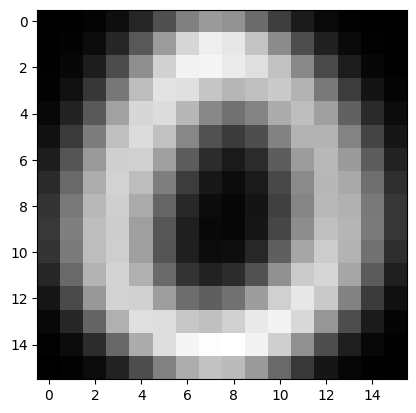

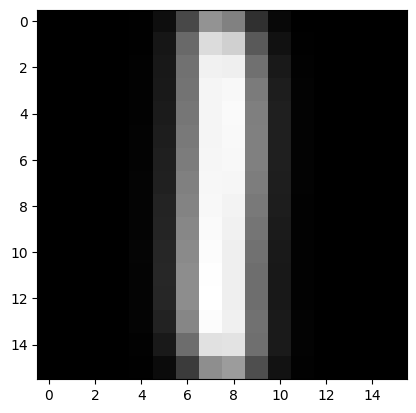

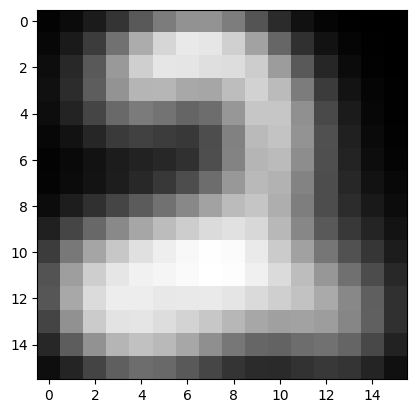

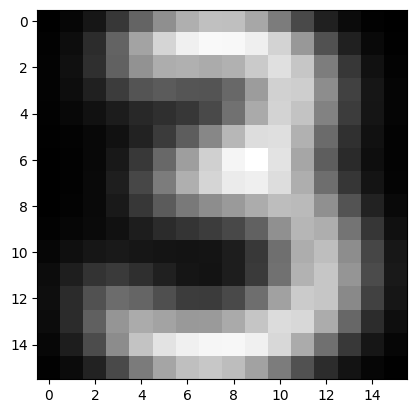

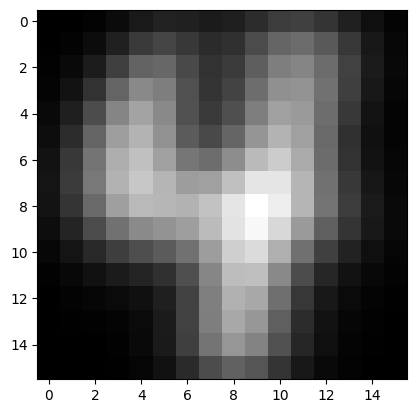

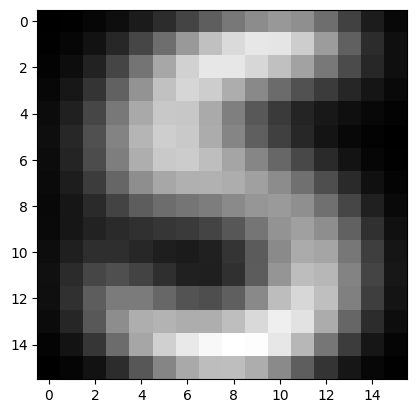

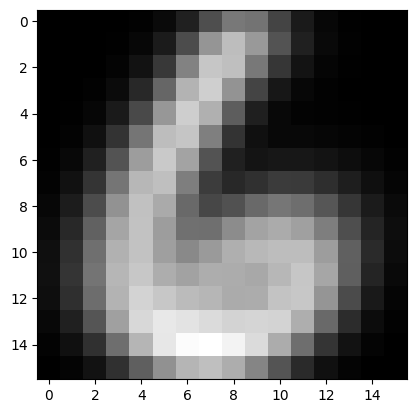

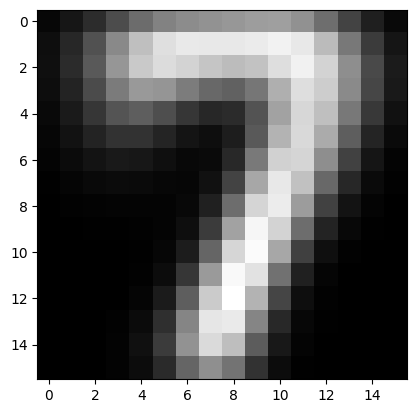

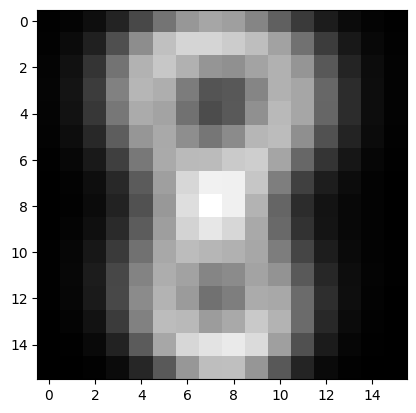

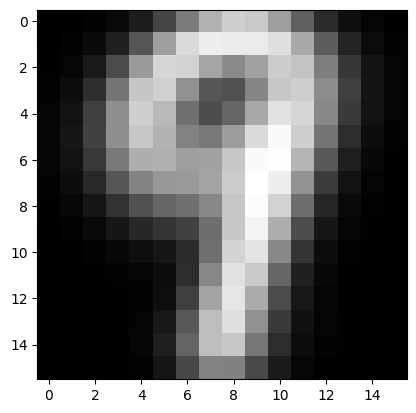

In [145]:
for array in U_array:
    image_plotter(array[:,0])

**Testing**

In [146]:
def classify_z(z, size_U, U_array):
    #image_plotter(z)

    digit_counter = 0
    residuals_with_info = []

    for U in U_array:
        U_chosen = U[:, :size_U]
        x = U_chosen @ (U_chosen.T @ z)
        residual_vector = z - x
        residual = np.linalg.norm(residual_vector) ** 2
        residual_with_info = [residual, digit_counter] 
        residuals_with_info.append(residual_with_info)
        digit_counter += 1
    
    # Find the digit class with the smallest residual
    lowest_residual, identified_digit = min(residuals_with_info, key=lambda x: x[0])
    
    return identified_digit

In [147]:
def open_test(path, size_U, digit, U_array):
    percentage_correct_classification = 0

    df = pd.read_csv(path)
    Images_Matrix = np.array(df).transpose()
    
    for i in range(Images_Matrix.shape[1]):
        z = Images_Matrix[:, i]
        identified_digit = classify_z(z, size_U, U_array)
        if identified_digit == digit:
            percentage_correct_classification += 1

    percentage_correct_classification /= Images_Matrix.shape[1]
    return percentage_correct_classification



In [148]:
def main_test_coordinator():
    for size_U in [1,2,4,5,8,10]:

        Basis_size_accuracy = 0
        for digit in [0,1,2,3,4,5,6,7,8,9]:
            percentage_correct_classification = open_test(f'USPS Digits/usps-testing-{digit}.csv', size_U, digit, U_array)
            Basis_size_accuracy = Basis_size_accuracy + percentage_correct_classification

        percentage_correct_classification = Basis_size_accuracy*10
        print(f'Using {Fore.RED}{size_U}{Style.RESET_ALL} Basis Vector/s from the SVD, the algorithm achieved an accuracy in identifying Digits 0-9 of {Fore.GREEN}' + f'{percentage_correct_classification:.2f}%{Style.RESET_ALL}')


In [149]:
if __name__ == '__main__':
    main_test_coordinator()

Using 1 Basis Vector/s from the SVD, the algorithm achieved an accuracy in identifying Digits 0-9 of 79.83%
Using 2 Basis Vector/s from the SVD, the algorithm achieved an accuracy in identifying Digits 0-9 of 84.25%
Using 4 Basis Vector/s from the SVD, the algorithm achieved an accuracy in identifying Digits 0-9 of 90.92%
Using 5 Basis Vector/s from the SVD, the algorithm achieved an accuracy in identifying Digits 0-9 of 91.76%
Using 8 Basis Vector/s from the SVD, the algorithm achieved an accuracy in identifying Digits 0-9 of 93.28%
Using 10 Basis Vector/s from the SVD, the algorithm achieved an accuracy in identifying Digits 0-9 of 94.24%
